<a href="https://colab.research.google.com/github/BreckoD/DataSciencePracticum2023/blob/main/Assignment_08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Transaction Analysis


In [ ]:
!pip install -q kaggle

## 1. Imports
### 1.1. Import relevant libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### 1.2 Get and Load the dataset into a dataframe

In [ ]:
import os

os.environ['KAGGLE_USERNAME'] = 'devashish2002'
os.environ['KAGGLE_KEY'] = '4f267a82ba3daa97f6a8e7824eb3a762'

In [ ]:
!kaggle datasets download -d vivek468/superstore-dataset-final
!unzip superstore-dataset-final.zip

  0% 0.00/550k [00:00<?, ?B/s]
100% 550k/550k [00:00<00:00, 37.9MB/s]
Archive:  superstore-dataset-final.zip
  inflating: Sample - Superstore.csv  


In [ ]:
df = pd.read_csv('Sample - Superstore.csv', encoding='ISO-8859-1')
df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [ ]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Year_Quarter', 'Year_Month', 'Years', 'Quarters', 'Delivery Time',
       'Cluster'],
      dtype='object')

## 2. Data preprocessing

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [ ]:
df.shape

(9994, 21)

In [ ]:
df.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object

In [ ]:
df.drop_duplicates().shape

(9994, 21)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [ ]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


## 3. Exploratory data analysis

### 3.1 Orders, Products, and Customers

In [ ]:
print('Total number of orders: ',df['Order ID'].nunique())
print('Total number of products: ', df['Product ID'].nunique())
print('Total number of customers: ', df['Customer ID'].nunique())

Total number of orders:  5009
Total number of products:  1862
Total number of customers:  793


### 3.2 Category

In [ ]:
df['Category'].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

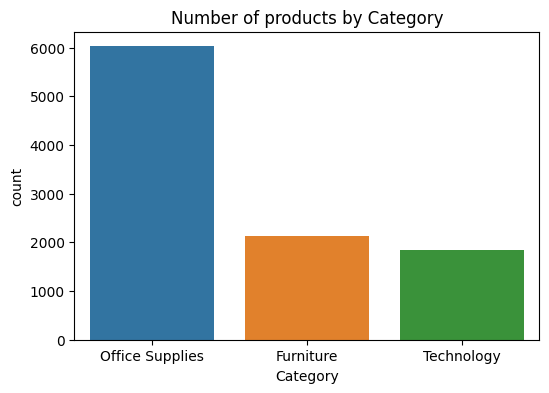

In [ ]:
plt.figure(figsize=(6,4))
df_sorted=df['Category'].value_counts().sort_values(ascending=False).index
sns.countplot(x='Category', data=df,order=df_sorted)
plt.title('Number of products by Category')
plt.show()

### 3.3 Sales

In [ ]:
df['Sales'].describe()

count     9994.000000
mean       229.858001
std        623.245101
min          0.444000
25%         17.280000
50%         54.490000
75%        209.940000
max      22638.480000
Name: Sales, dtype: float64

In general, these statistics indicate that there is a large variability in the sales values between transactions, with some transactions having very high values compared to the majority of the other transactions

<ipython-input-16-937bb3ed7865>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Sales'])


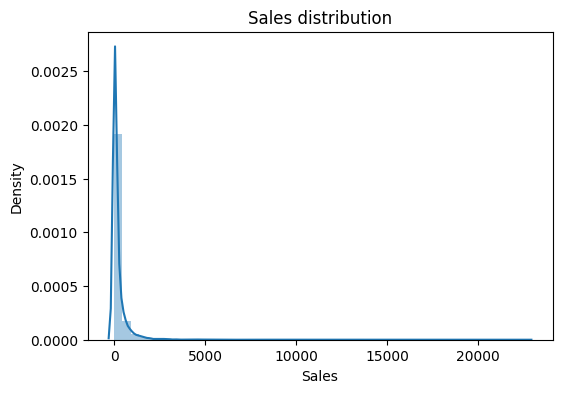

In [ ]:
plt.figure(figsize=(6,4))
sns.distplot(df['Sales'])
plt.title('Sales distribution')
plt.show()

### 3.4 Quantity

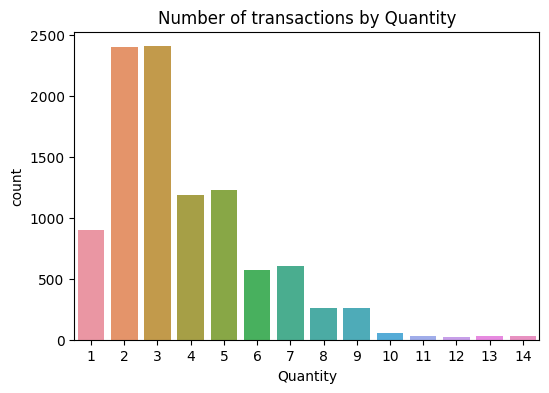

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='Quantity',data=df)
plt.title('Number of transactions by Quantity')
plt.show()

The most common quantities were 2 and 3, accounting for approximately 50%. Transactions involving 4 and 5 quantities were less popular, but their observations were in mid-level, at around 1250 observations. Higher than 10 quantities were less common, just occuring in a small number of transactions.

### 3.5 Ship Mode

In [ ]:
df['Ship Mode'].value_counts()

Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64

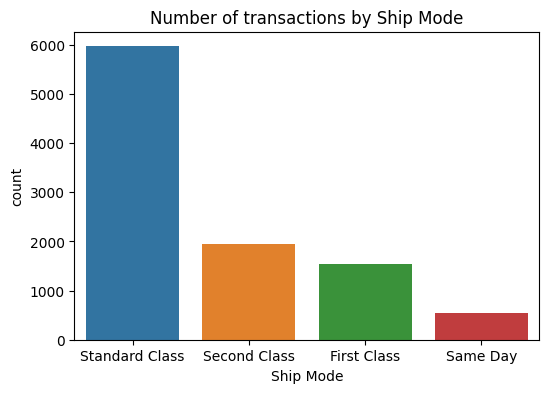

In [ ]:
plt.figure(figsize=(6,4))
sorted_data=df['Ship Mode'].value_counts().sort_values(ascending=False).index
sns.countplot(x='Ship Mode',data=df,order=sorted_data)
plt.title('Number of transactions by Ship Mode')
plt.show()

Standard Class is the most popular ship mode, with 5968 observations, followed by Second Class and First Class at 1945 observations and 1538 observations respectively. The least popular ship mode is Same Day option, which the values at 543. This would suggest that most customer selected Standard Class as their primary shipping mode when shipping online.

###  3.6 Total orders by States

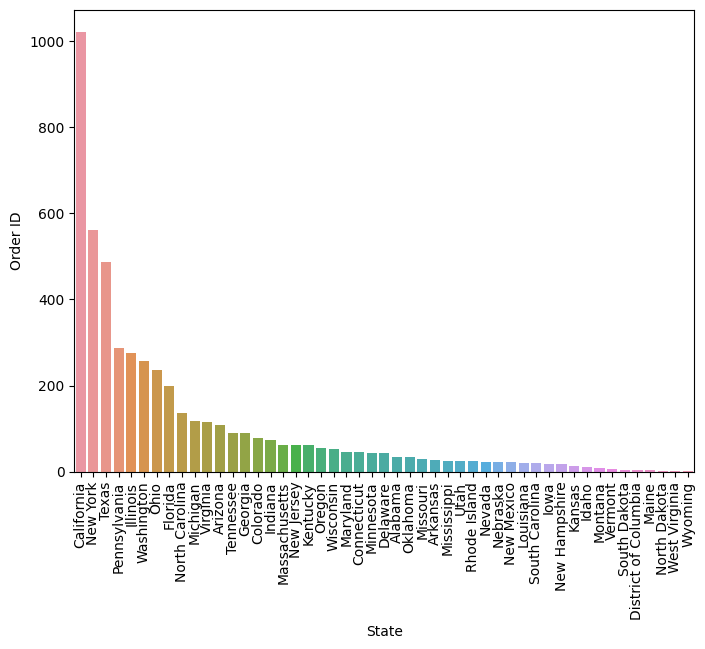

In [ ]:
plt.figure(figsize=(8,6))
dd=df.groupby('State')['Order ID'].nunique().sort_values(ascending=False).reset_index()
sns.barplot(data=dd,x='State',y='Order ID')
plt.xticks(rotation=90)
plt.show()

In [ ]:
a=df.groupby('State')['Order ID'].nunique().sort_values(ascending=False).reset_index()
a

,State,Order ID
0,California,1021
1,New York,562
2,Texas,487
3,Pennsylvania,288
4,Illinois,276
5,Washington,256
6,Ohio,236
7,Florida,200
8,North Carolina,136
9,Michigan,117


The chart shows that California had the highest orders, which values more than 1021. New York and Texas were in second and third place, with 562 orders and 487 orders, respectively. The remaining states had a small number of orders.

This indicates that shopping activities were highly frequent in large states, particularly California, New York, and Texas.

### 3.7 Total Orders by quarters and years

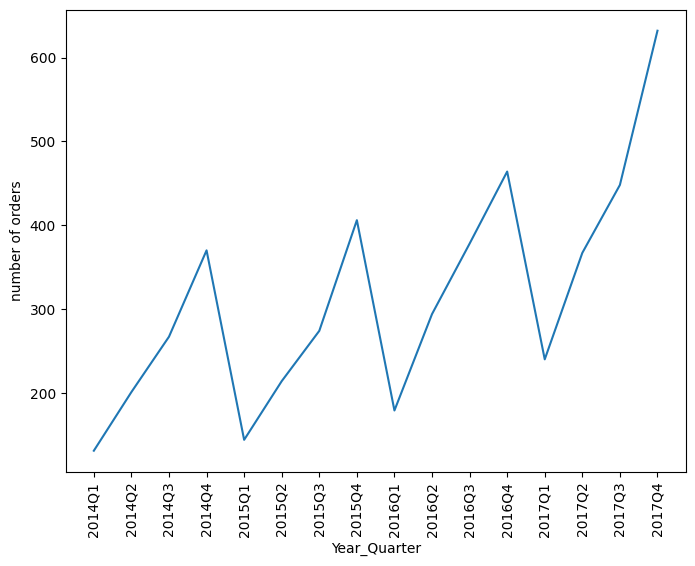

In [ ]:
plt.figure(figsize=(8,6))
df['Order Date']=pd.to_datetime(df['Order Date'])


df['Year_Quarter']=df['Order Date'].dt.to_period('Q')
df['Year_Quarter']=df['Year_Quarter'].astype(str)

orders_by_quarter_year=df.groupby(['Year_Quarter'])['Order ID'].nunique().reset_index()
sns.lineplot(data=orders_by_quarter_year, x='Year_Quarter', y='Order ID')
plt.ylabel('number of orders')
plt.xticks(rotation=90)
plt.show()

Overall, the line chart shows an upward trend in total orders. To be more detailed, the figure was always low in the first quarter, then increased gradually and peaked in the fourth quarter.

It means that customers' shopping habits increased at the end of the year. Therefore, we should launch appropriate plans to boost this metric

### 3.8 Sales over months and years

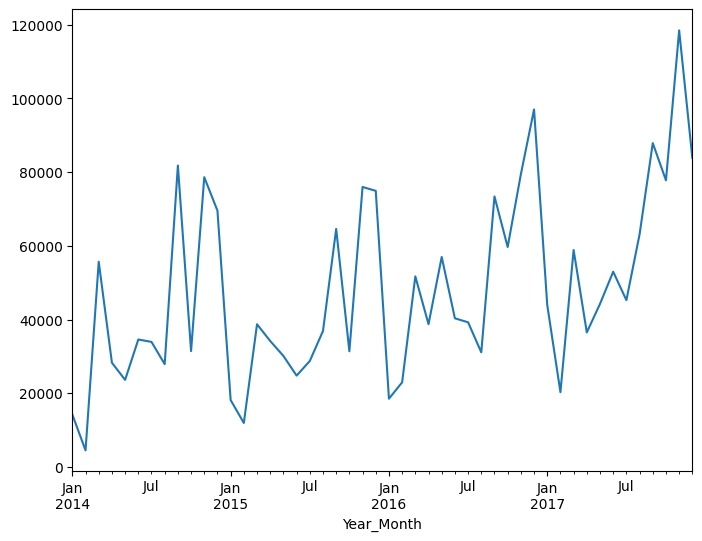

In [ ]:
plt.figure(figsize=(8,6))

df['Order Date']=pd.to_datetime(df['Order Date'])

df['Year_Month']=df['Order Date'].dt.strftime('%b %Y')
df['Year_Month']=pd.to_datetime(df['Year_Month'])
df_sorted=df.sort_values('Year_Month')

df.groupby(['Year_Month'])['Sales'].sum().plot(kind='line')
plt.show()

It can be seen from the chart that the sales had an upward trend over years. In a particular year, the sales of first six months tend to be less than that of last six months. During the end of year in 2017, the line chart increased dramatically in October, then significantly declined in November.

This would suggest that customers had a tendency to spend more at the end of year, while shopping activities in the first half of year were less frequent.

### 3.9 Category sales over quarters and years

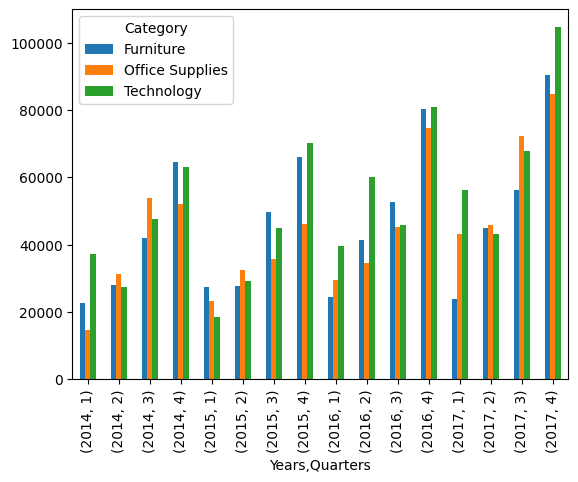

In [ ]:
df['Order Date']=pd.to_datetime(df['Order Date'])
df['Years'], df['Quarters']=df['Order Date'].dt.year, df['Order Date'].dt.quarter
df.groupby(['Years','Quarters','Category'])['Sales'].sum().unstack().plot(kind='bar')
plt.show()

The diagram illustrates that all categories had an uptrend from the first to the fourth quarter. In the last quarter of each year, Technology consistently ranked in the first position, meaning that customers purchased more technology products at the end of the year.

### 3.10 Profit by Quarter and Category

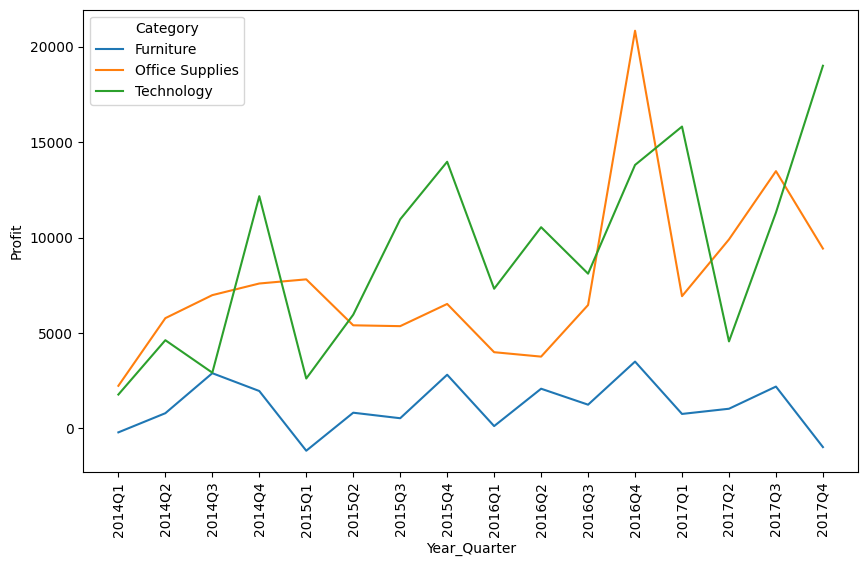

In [ ]:
plt.figure(figsize=(10,6))
df['Order Date'] = pd.to_datetime(df['Order Date'])

df['Year_Quarter'] = df['Order Date'].dt.to_period('Q')
df['Year_Quarter'] = df['Year_Quarter'].astype(str)
profit_by_quarter_category = df.groupby(['Year_Quarter', 'Category'])['Profit'].sum().reset_index()

sns.lineplot(data=profit_by_quarter_category, x='Year_Quarter', y='Profit', hue='Category')
plt.xticks(rotation=90)
plt.show()


While total sales is always a positive number, profit can be a negative value. The line chart describes the profit of 3 categories from Q1/2014 to Q4/2018. Overall, the profits grew over the given period in two categories: office supplies and technology.

Office Supplies reached a peak at 20000 USD in Q4/2016, then significantly declined more than 5000 USD in Q1/2017. The profit increased lightly in Q3/2017 after dropped under 10000 USD in Q4/2017. In constrast, Furniture achieved the lowest profit during the given time. Its profits fluctuated through the period and the profit was under 0 USD in Q4/2017.

Regarding Technology, the figure had an upward trend from more than 1000 USD in Q1/2014 to nearly 20000 USD in Q4/2017


### 3.11 Time Delivery

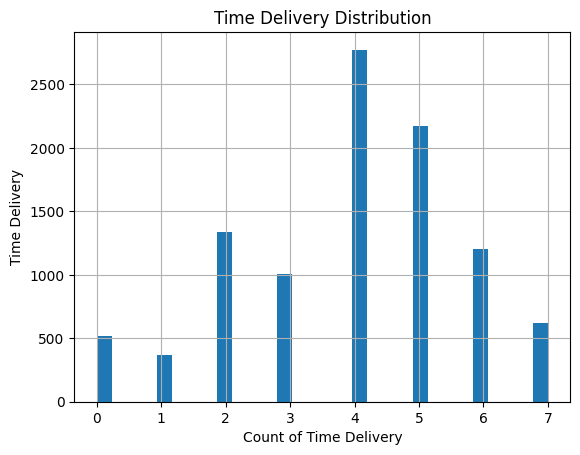

In [ ]:
df['Ship Date'] = pd.to_datetime(df['Ship Date'])
df['Delivery Time'] = (df['Ship Date'] - df['Order Date']).dt.days
df['Delivery Time'].hist(bins=30)
plt.title('Time Delivery Distribution')
plt.xlabel('Count of Time Delivery')
plt.ylabel('Time Delivery')
plt.show()


Time Delivery by calculating the days difference between ship date and order date. The delivery time distribution shows that more than 2500 transactions have been shipped in 4 days after ordering, which is the most common delivery duration. The following are 5 days and 2 days, with the transactions being around more than 2000 and nearly 1500 respectively.

### 3.12 Number of orders by shipping Mode

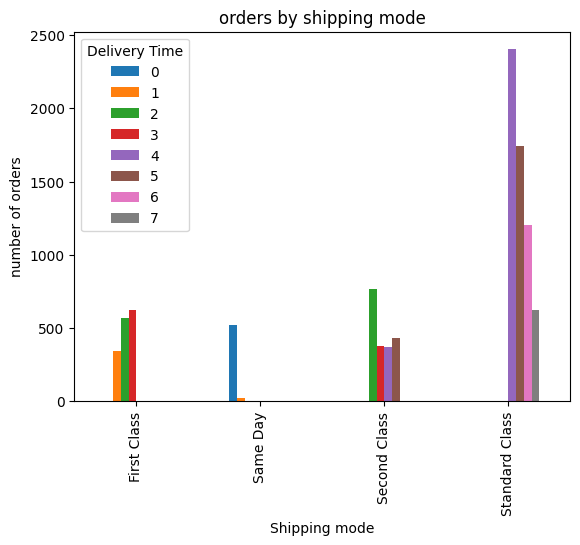

In [ ]:
ship_mode_delivery_time = df.groupby(['Ship Mode', 'Delivery Time'])['Order ID'].count().unstack()

ship_mode_delivery_time.plot(kind='bar', stacked=False)

plt.title('orders by shipping mode')
plt.xlabel('Shipping mode')
plt.ylabel('number of orders')
plt.show()


There are 500 transactions shipped by the same date as order date and a few transactions in 1 days, labeled by Same Day. The First Class transactions could be shipped from 1 to 3 days, which was faster than the Second Class. The Standard Class transactions were delivered slowest, from 4 to 7 days. This means customers should allow more waiting time to receive products when selecting Standard Class as Ship Mode.

### 3.13 Sales, Profit and Discounts

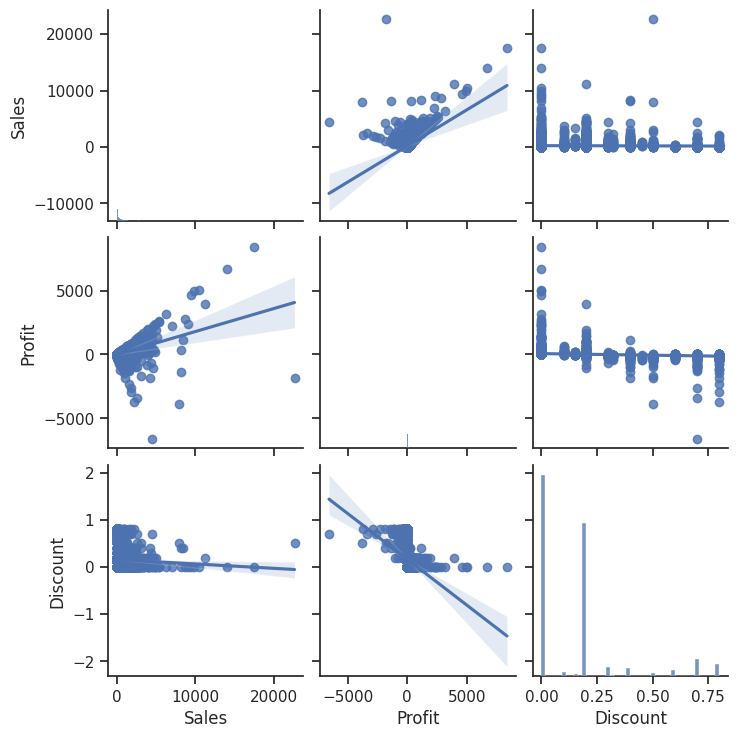

In [ ]:
sns.set(style="ticks")
sns.pairplot(df[['Sales', 'Profit', 'Discount']], kind='reg')
plt.show()

In [ ]:
df[['Sales', 'Profit', 'Discount']].corr('spearman')

,Sales,Profit,Discount
Sales,1.000000,0.518407,-0.056969
Profit,0.518407,1.000000,-0.543350
Discount,-0.056969,-0.543350,1.000000


As expected, the profits have a negative trend with more discounts. However, no such trend is seen for sales. In addition, there is a positive correlation between sales and profits. The Spearman correlation coefficients show a moderate relationship between these variables.

#### Sales and profits by category

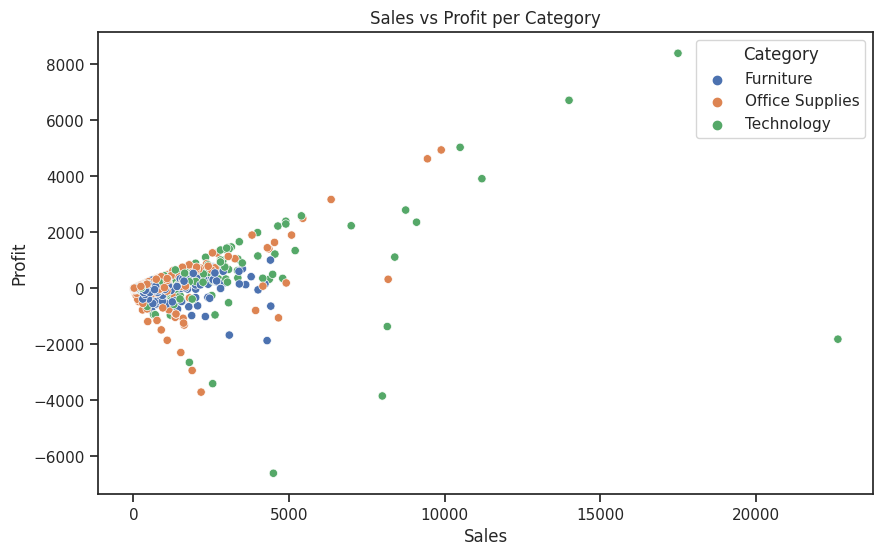

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Sales', y='Profit', hue='Category')
plt.title('Sales vs Profit per Category')
plt.show()

As we can see that there are many transactions on Furniture at the bottom of the plot, indicating low sales and low profit or even loss. However, there are also some transactions with high sales and profit. Most transactions in Office Supplies Category have low sales and low profit, but there is a few transactions with high sales and profit. Turning to the remaining category, Technology seems to be the highest sales and profit compared to the other two categories. Many transations with high sales and profit.

## 4. Customer Segmentation

Customer Segmentation is the process of dividing customers into groups that are similar in several characteristics. We use unsupervised method, particularly K-means clustering method to perform this task.

We consider Sales and Profit as two attributes to segment customers. From their distributions, Sales per customer distribution is highly right skewed while that of profit is a belt curve.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [ ]:
# standardize the data to remove any scale issues
X = df[['Sales','Profit']]
sc = StandardScaler()
X_std = sc.fit_transform(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

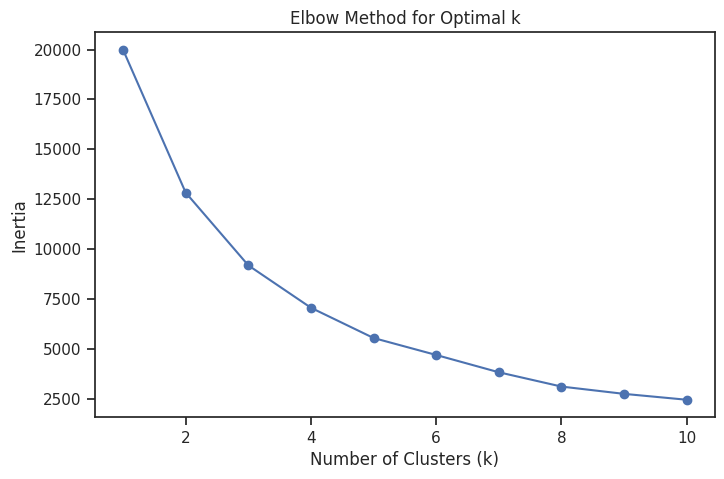

In [ ]:
# Initialize an empty list to store the inertia (within-cluster sum of squares) values
inertia = []

# Test different values of k
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_std)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

We use the Elbow method to identify the point where the WCSS begins to level off. The optimal value of number of clusters seem to be 4-6 from the plot. We choose it to be 4 for further analysis.

In [ ]:
model = KMeans(n_clusters=4).fit(X_std)
df['Cluster'] = model.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


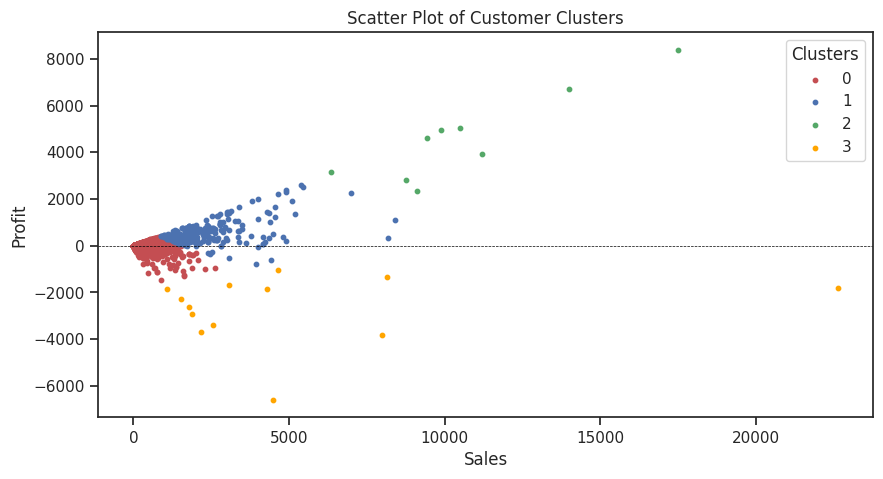

In [ ]:
plt.figure(figsize=(10, 5))

colors=['r', 'b', 'g', 'orange']

for i in range(4):
  df_ = df[df['Cluster'] == i]
  scatter = plt.scatter(df_['Sales'], df_['Profit'], c=colors[i], s=10)

plt.legend([0, 1, 2, 3], title='Clusters')
plt.axhline(y = 0, color = 'black', linestyle = '--', linewidth=0.5)

plt.xlabel('Sales')
plt.ylabel('Profit')
plt.title('Scatter Plot of Customer Clusters')
plt.show()

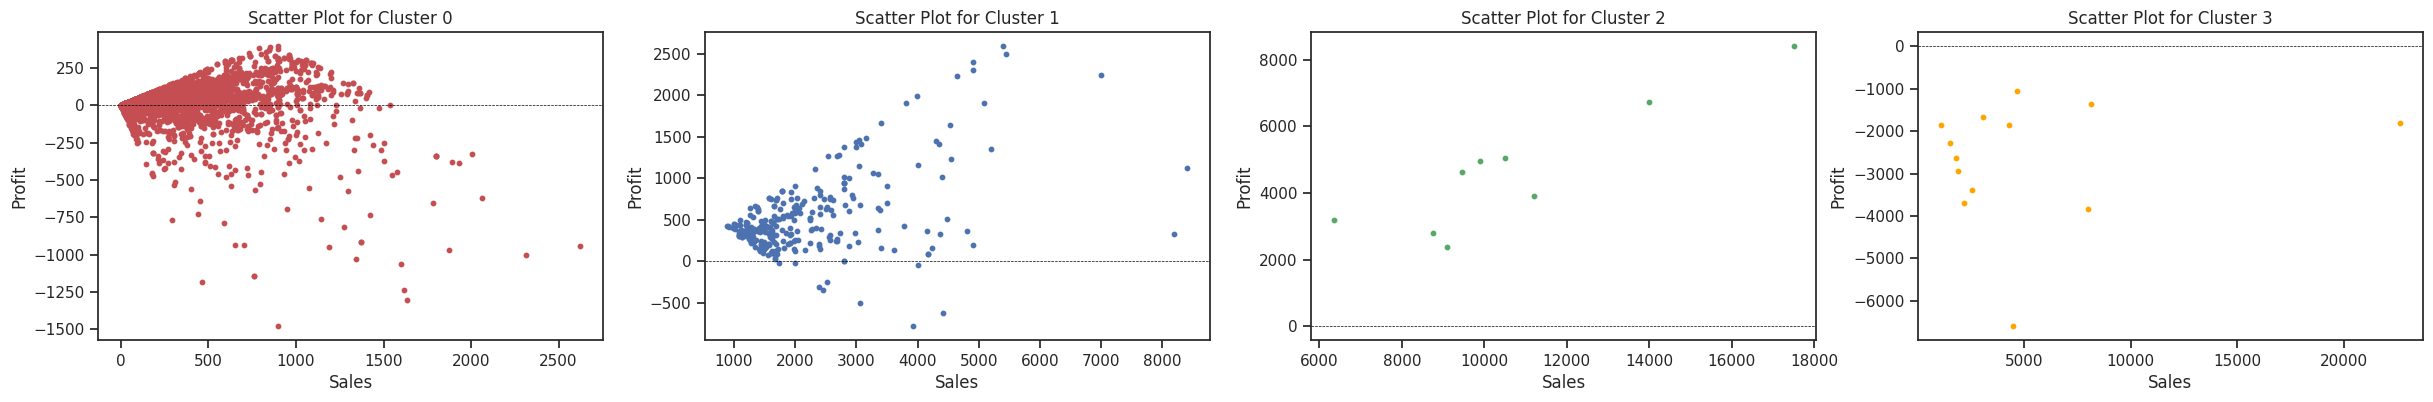

In [ ]:
fig, axs = plt.subplots(1, 4, figsize=(30, 4))

colors = ['r', 'b', 'g', 'orange']
for i in range(4):
  df_ = df[df['Cluster'] == i]
  axs[i].scatter(df_['Sales'], df_['Profit'], c=colors[i], s=10)
  axs[i].axhline(y = 0, color = 'black', linestyle = '--', linewidth=0.5)

  axs[i].set_xlabel('Sales')
  axs[i].set_ylabel('Profit')
  axs[i].set_title(f'Scatter Plot for Cluster {i}')

**Simple interpretation of result**

|Cluster| Characteristics |
|---| ---|
|Cluster 0| The biggest cluster. Sales were less than 2500 USD and many customers brought negative profit.|
|Cluster 1| Sales were higher than in cluster 0 (up to 8000 USD) and there were fewer negative profit customers.|
|Cluster 2| The cluster contains the customers with the biggest sales (6000-18000 USD) and only positive profit.|
|Cluster 3| The cluster contains only the customers that brought severe negative profit.|



## 7. Conclusion

After utilizing different techniques, we discovered the following insights:

• Shopping activities were more frequent in big cities such as California, New York, and Texas.

• The number of orders were always highest in the fourth quarters, indicating an appropriate plan should be taken at the end of the year to maximize this metric.

• Sales had an upward trend over years.

• Customers had a habit of spending more at the end of year, especially purchasing Technology products.

• The Standard Class was the most common ship mode, with time delivery from 4 to 7 days.

• There is a clear difference in sales and profit per Categoty. These differences suggest that each Category has its own characteristics and needs to be carefully considered when planning for business.

Finally, we classify customers into 4 groups based on sales and profits, which allows the marketing department to have a deeper level of understanding them.